# Aula Prática 8 (guião)
### Semana de 30 de Outubro a 3 de Novembro de 2023
### José Carlos Ramalho e Luís Cunha
### Sinopsis:
Consolidação e aferição de tudo o que foi feito até ao momento. 

### Assunto: Frações
Vamos pensar num modelo: o que é uma fração estruturalmente?

In [39]:
# Modelo duma fração
f1 = (1,2)
# Modelo duma lista de frações

listaf = [(1,2), (1,3), (3,4)]

### Construtor

In [40]:
def criarFracao(numerador, denominador):
    return (numerador, denominador)

def verFracao(f):
    print (f[0], "/", f[1], sep="")  
    # se usarmos a vígula não precisa do str mas se fosse com + era preciso o str
    # num print se pusermos end = "x", ele em vez de fazer parágreado para o próximo print faz x
    # sep = "" permite tirar os espaços que as vígulas por defeito dão, se pusessemos sep=";" ele separava por ;

verFracao(f1)

1/2


In [41]:
f2 = criarFracao(2,3)
verFracao(f2)

2/3


### Simplificação de frações

In [42]:
def mdc(a,b):
    while a != b:
        if a > b:
            # aux = a 
            # a = b
            # b = aux - b
            a, b = b , a-b
        else:
            a, b = b, a
    return b

def simplificarFracao(f):
    divisor = mdc(f[0], f[1])
    return (int(f[0] / divisor), int(f[1] / divisor))

In [43]:
verFracao(simplificarFracao(criarFracao(21, 140)))

3/20


### Frações equivalentes

Defina uma função que recebe duas frações como argumento e devolve `True` se as frações são equivalentes e `False` caso contrário.

In [44]:
def equivalenteFracao(f1,f2):
    return simplificarFracao(f1) == simplificarFracao(f2)

print(equivalenteFracao(f1,f2))
f3 = (4,2)
f4 = (8,4)
print(equivalenteFracao(f3,f4))
 

False
True


In [45]:
f3 = (8,4)
f4 = (4,2)
f5 = (3,7)
print(equivalenteFracao(f3,f4))
print(equivalenteFracao(f3,f5))


True
False


## Operações sobre frações

In [46]:
def somarFrac(f1, f2):
    num1 , den1 = f1
    num2 , den2 = f2
    if den1 == den2:
        return int(num1 + num2), int(den1)

    else: 
        return int(num1)*int(den2) + int(num2)*int(den1), int(den1)*int(den2) 

f2 = criarFracao(5,7)
verFracao(somarFrac(f1,f2))

17/14


In [47]:
#forma do stor 

def somarFrac(f1, f2):
    return simplificarFracao((f1[0]*f2[1]+ f2[0]*f1[1], f1[1]*f2[1]))
    

f2 = criarFracao(5,7)
verFracao(somarFrac(f1,f2))

17/14


In [48]:
listaFrac = [f1, f2, criarFracao(125,1000), (8,12)]
listaFrac2 = []
import random
for i in range(1,20):
    n = random.randrange(1, 10)
    d = random.randrange(2, 20)
    listaFrac2.append(criarFracao(n,d))
print(listaFrac2)

[(5, 12), (8, 3), (7, 4), (5, 6), (4, 10), (2, 10), (1, 8), (5, 2), (1, 10), (4, 14), (7, 19), (8, 2), (1, 16), (5, 5), (2, 19), (4, 16), (3, 16), (7, 15), (5, 14)]


### Soma uma lista de frações

In [49]:
def somarListaFrac(lista):
    res = lista[0]
    for f in lista[1:]:
        res= somarFrac(res,f)
    return res 

#o lista[1:] faz basicamente slice [start:stop:step] e ter [0:2] aquilo so vai ate ao indice 1, nao vai ate ao indice, retorna tipo a qunatidade de valores que tu meteres

somarListaFrac(listaFrac)

(337, 168)

### Multiplica 2 frações

In [50]:
def multFrac(f1, f2):
    num1 , den1 = f1
    num2 , den2 = f2
    return int(num1 * num2), int(den1 * den2)

f2 = criarFracao(5,7)
verFracao(multFrac(f1,f2))

5/14


Apontamento

In [ ]:
#APONTAMENTO

l=[0,2,3,4,5,6]

l[2:4]

#para inverter - porque step inves de ir 1 em 1, vai de -1 em -1 
l[::-1]

#QUANDO ESTÁ L[:5] isto vai até 4, porque e a excluir o ultimo elemento
#lista[:-1] é todos menos o ultimo

### Ordenar uma lista de frações por ordem decrescente

In [51]:
def ordena(f) :
    return f[0]/f[1]

def ordenaFracDec(lista):
    return sorted(lista, key = ordena, reverse=False)
    
ordenaFracDec(listaFrac)

[(125, 1000), (1, 2), (8, 12), (5, 7)]

### Guardar uma lista de frações num ficheiro

In [52]:
def gravaListaFrac(fnome, lista):
    file = open(fnome, "w")
    for f in lista :
        registo = str(f[0]) + "/" + str(f[1])+ "\n"
        file.write(registo)
    file.close()
    return 

gravaListaFrac("olafracoes.txt", listaFrac2)
#, é so em print

### Recuperar uma lista de frações dum ficheiro

In [53]:
def carregaListaFrac(fnome):
    file = open(fnome, "r")
    res = []
    for line in file:
        line = line[:-1]
       #AQUI TEM :-1 QUE É PARA NAO CONTABILIZAR O \N
        fracao = line.split("/")
        res.append((int(fracao[0]),int(fracao[1])))
#TEMOS QUE METER O INT ANTES PORQUE OS NUMEROS VEM DO FICHEIRO EM FORMA STRING, OU SEJA, SE IMPRIMIRES VEM ASSIM '8', INVÉS DE 8
    file.close()
    return res

print(carregaListaFrac("olafracoes.txt"))

[(5, 12), (8, 3), (7, 4), (5, 6), (4, 10), (2, 10), (1, 8), (5, 2), (1, 10), (4, 14), (7, 19), (8, 2), (1, 16), (5, 5), (2, 19), (4, 16), (3, 16), (7, 15), (5, 14)]


## TPC8: Teste de aferição

Resolva os problemas apresentados a seguir.

### tpc-1. Especifique as seguintes listas em compreensão:

#### a) Lista formada pelos elementos que não são comuns às duas listas:

In [13]:
lista1 = [1, 2, 3, 4, 5]
lista2 = [4, 5, 6, 7, 8]  
comuns = [...]

def naocomuns(lista1,lista2):
    ncomuns = []
    for i in lista1:
        if i not in lista2: 
            ncomuns.append(i)
    for i in lista2:
        if i not in lista1 and i not in ncomuns:
            ncomuns.append(i)
    return ncomuns

naocomuns(lista1,lista2)

# Resultado esperado: [1,2,3,6,7,8]

[1, 2, 3, 6, 7, 8]

#### b) Lista formada pelas palavras do texto compostas por mais de 3 letras:

In [21]:
texto = """Vivia há já não poucos anos algures num concelho do Ribatejo 
    um pequeno lavrador e negociante de gado chamado Manuel Peres Vigário"""
lista = [...]

def mais3letras(texto):
    superiores = []
    texto = texto.strip("\n")
    texto = texto.split(" ")
    for palavra in texto:
        if len(palavra) > 3:
            superiores.append(palavra)
    return superiores 

mais3letras(texto)

# Resultado esperado: ['Vivia', 'poucos', 'anos', 'algures', 'concelho', ...]

['Vivia',
 'poucos',
 'anos',
 'algures',
 'concelho',
 'Ribatejo',
 'pequeno',
 'lavrador',
 'negociante',
 'gado',
 'chamado',
 'Manuel',
 'Peres',
 'Vigário']

#### c) Lista formada por pares do tipo (índice, valor) com os valores da lista dada:

In [22]:
lista = ['anaconda', 'burro', 'cavalo', 'macaco']
listaRes = [...]

def pares(lista):
    res = []
    for palavra in lista:
        num = lista.index(palavra) + 1
        res.append((num,palavra))
    return res

pares(lista)
    
# Resultado esperado: [(1,'anaconda'), (2,'burro'), (3,'cavalo'), (4,'macaco')]

[(1, 'anaconda'), (2, 'burro'), (3, 'cavalo'), (4, 'macaco')]

### tpc-2. À semelhança do que foi feito nas aulas, realize as seguintes tarefas:

#### a) Especifique uma função que dada uma string e uma substring não vazia, calcula  o número de vezes em que a substring aparece na string, sem que haja sobreposição de substrings:

In [2]:
def strCount(s, subs):
    res = 0
    i = 0
    while i < len(s):
        if s[i:i + len(subs)] == subs:
            res = res + 1
            i = i + len(subs)
        else: i = i + 1
    return res

print(strCount("catcowcat", "cat")) # --> 2
print(strCount("catcowcat", "cow")) # --> 1
print(strCount("catcowcat", "dog")) # --> 0

2
1
0


#### b) Especifique uma função que recebe uma lista de números inteiros positivos e devolve o menor produto que for possível calcular multiplicando os 3 menores inteiros da lista:

In [26]:
def ordenaLista(lista):

    t = len(lista)

    while t > 0:
        for n in range(len(lista)-1):
            if lista[n] > lista[n+1]:
                lista[n], lista[n+1] = lista[n+1], lista[n]
        t = t - 1
    
    return lista

#para ordenara a lista também posso utilizar as funções .sort() ou .sorted(...)

def produtoM3(lista):
    listaordenada = ordenaLista(lista)
    res = listaordenada[0]*listaordenada[1]*listaordenada[2]
    return  res

print(produtoM3([12,3,7,10,12,8,9]))
# Resultado esperado: 168 = 3 * 7 * 8

168


#### c) Especifique uma função que dado um número inteiro positivo, repetidamente adiciona os seus dígitos até obter apenas um dígito que é retornado como resultado:

In [25]:
# Input: 38
# Output: 2
# Explicação: 3 + 8 = 11, 1 + 1 = 2.

# Input: 777
# Output: 3
# Explicação: 7 + 7 + 7 = 21, 2 + 1 = 3.

def soma (lista):
    i = 0
    soma = 0
    while i < len(lista) :
        soma = soma + int(lista [i])
        i = i + 1
    return soma 

def reduxInt(n):
    l = list(str(n))
    somat = 0
    while len(l) != 1:
        somat = soma(l)
        l = list(str(somat)) 
    return l


reduxInt(9117)

['9']

#### d) Especifique uma função que recebe duas strings, `string1` e `string2`, e devolve o índice da primeira ocorrência de `string2` em `string1`, caso não ocorra nenhuma vez a função deverá retornar `-1`:

In [35]:
# Invocação: indexOf("Hoje está um belo dia de sol!", "belo")
# Resultado: 13

# Invocação: indexOf("Hoje está um belo dia de sol!", "chuva")
# Resultado: -1

def IndexOf(s1, s2):
    ls1 = list(s1)
    for palavra in ls1:
        if s2[0] == palavra:
            return "Resultado: " + str(ls1.index(palavra))
    else: 
        return "Resultado: " + "-1"
        
print(IndexOf("Hoje está um belo dia de sol!", "belo"))
print(IndexOf("Hoje está um belo dia de sol!", "chuva"))

Resultado: 13
Resultado: -1


### tpc-3. A Rede Social

Considere que a informação sobre uma rede social está armazenada numa lista de dicionários.

Cada dicionário, correspondente a um _post_ e tem chaves `id`, `conteudo`, `autor`, `dataCriacao` e `comentarios`.
Por sua vez, `comentarios` é uma lista de dicionários com chaves `comentario` e `autor`.

Considere o seguinte exemplo:

``` 
    MyFaceBook = [{
        'id': 'p1', 
        'conteudo': 'A tarefa de avaliação é talvez a mais ingrata das tarefas que um professor
    tem de realizar...', 
        'autor': 'jcr', 
        'dataCriacao': '2023-07-20', 
        'comentarios': [
            {
                'comentario': 'Completamente de acordo...',
                'autor': 'prh'
            },
            {
                'comentario': 'Mas há quem goste...',
                'autor': 'jj'
            }
        ]},
        {
            'id': 'p2',
            ...
        },
        ...
        ]
```

In [30]:
 MyFaceBook = [{
        'id': 'p1', 
        'conteudo': 'A tarefa de avaliação é talvez a mais ingrata das tarefas que um professor tem de realizar...', 
        'autor': 'jcr', 
        'dataCriacao': '2023-07-20', 
        'comentarios': [
            {
                'comentario': 'Completamente de acordo...',
                'autor': 'prh'
            },
            {
                'comentario': 'Mas há quem goste...',
                'autor': 'jj'
            }
        ]}, 
        {'id': 'p2',
        'conteudo': 'Hoje esteve um ótimo dia ',
        'autor': 'Carolina ',
        'dataCriacao': '2023-11-20',
        'comentarios': [
            {
                'comentario': 'Estava um ótimo dia para passear ',
                'autor': 'Ana'
            }
        ]}
        ]

Defina as seguintes funções de manipulação e consulta da rede social:

#### a) `quantosPost`, que indica quantos posts estão registados:

In [2]:
def quantosPost(redeSocial):
    
    return len(MyFaceBook)

quantosPost(MyFaceBook)

2

#### b)  `postsAutor`, que devolve a lista de posts de um determinado autor:

In [4]:
def postsAutor(redeSocial, autor):
    lposts = []
    for post in redeSocial:
        if post["autor"] == autor:
            lposts.append(post)    
        return lposts
    else: 
        return "Autor não encontrado"

postsAutor(MyFaceBook, "jcr")

[{'id': 'p1',
  'conteudo': 'A tarefa de avaliação é talvez a mais ingrata das tarefas que um professor tem de realizar...',
  'autor': 'jcr',
  'dataCriacao': '2023-07-20',
  'comentarios': [{'comentario': 'Completamente de acordo...', 'autor': 'prh'},
   {'comentario': 'Mas há quem goste...', 'autor': 'jj'}]}]

#### c) `autores`, que devolve a lista de autores de posts ordenada alfabeticamente:

In [5]:
def autores(redeSocial):
    lautores = []
    for post in redeSocial:
        lautores.append(post["autor"]) 
    return lautores

autores(MyFaceBook) 

['jcr', 'Carolina ']

#### d) `insPost`, que acrescenta um novo post à rede social a partir dos parâmetros recebidos e devolve a nova rede social. 
    
O campo `id` devrá ser calculado a partir dos já existentes, por exemplo, se a rede tiver posts com id `p1`, `p2` e `p3`, o novo `id` deverá ser `p4`.

In [22]:
def insPost(redeSocial):
    novopost = {}
    ultimopost = redeSocial[-1]
    id_anterior = ultimopost["id"]
    id = "p" + str(int(id_anterior[1])+1)
    comentarios  =[]
    c = -1
    conteudo = input("Insira o conteúdo do seu post: ")
    autor = input("Insira o nome do autor do seu post: ")
    dataCriacao = input("Insira a data de criação do post (no formato AAAA-MM-DD): ")
    while c != "0":
        c = input("Insira o comentário e respetivo autor (separados por  , ) - Se não quiser inserir novos comentários prime o '0' e 'Enter'")
        if len(c) >= 2 and c != "0":
            com,aut = c.split(",")
            comentario = {"comentario": com, "autor": aut}
            comentarios.append(comentario)
    novopost = {"id": id, "conteudo": conteudo, "autor": autor, "dataCriacao": dataCriacao, "comentarios": comentarios}
    redeSocial.append(novopost)
    return redeSocial

insPost(MyFaceBook)

[{'id': 'p1',
  'conteudo': 'A tarefa de avaliação é talvez a mais ingrata das tarefas que um professor tem de realizar...',
  'autor': 'jcr',
  'dataCriacao': '2023-07-20',
  'comentarios': [{'comentario': 'Completamente de acordo...', 'autor': 'prh'},
   {'comentario': 'Mas há quem goste...', 'autor': 'jj'}]},
 {'id': 'p2',
  'conteudo': 'Hoje esteve um ótimo dia ',
  'autor': 'Carolina ',
  'dataCriacao': '2023-11-20',
  'comentarios': [{'comentario': 'Estava um ótimo dia para passear ',
    'autor': ' Ana'}]},
 {'id': 'p3',
  'conteudo': 'A comida caseira é a melhor',
  'autor': 'Maria ',
  'dataCriacao': '2023-11-20',
  'comentarios': [{'comentario': 'Para mim a melhor é a do restaurante ',
    'autor': ' Manel'}]}]

In [23]:
print(MyFaceBook)

[{'id': 'p1', 'conteudo': 'A tarefa de avaliação é talvez a mais ingrata das tarefas que um professor tem de realizar...', 'autor': 'jcr', 'dataCriacao': '2023-07-20', 'comentarios': [{'comentario': 'Completamente de acordo...', 'autor': 'prh'}, {'comentario': 'Mas há quem goste...', 'autor': 'jj'}]}, {'id': 'p2', 'conteudo': 'Hoje esteve um ótimo dia ', 'autor': 'Carolina ', 'dataCriacao': '2023-11-20', 'comentarios': [{'comentario': 'Estava um ótimo dia para passear ', 'autor': ' Ana'}]}, {'id': 'p3', 'conteudo': 'A comida caseira é a melhor', 'autor': 'Maria ', 'dataCriacao': '2023-11-20', 'comentarios': [{'comentario': 'Para mim a melhor é a do restaurante ', 'autor': ' Manel'}]}]


#### e)  `remPost`, que remove um post da rede, correspondente ao `id` recebido.

In [24]:
def remPost(redeSocial, id):
    post_retirar = {}
    id_dado = "p" + str(id)
    if 1 <= id <= len(redeSocial):
        for post in redeSocial:
            if post["id"] == id_dado:
                post_retirar = post
        certeza = input("Tem a certeza que quer remover o post p" + str(id) + " ? \nPara confirmar digite 'Sim'")
        if certeza == "Sim":
            del redeSocial[id-1]
        return "O post foi removido com sucesso! A sua rede social agora é: " + str(redeSocial)
    else: 
        print("O id inserido não é válido")

remPost(MyFaceBook, 3)

"O post foi removido com sucesso! A sua rede social agora é: [{'id': 'p1', 'conteudo': 'A tarefa de avaliação é talvez a mais ingrata das tarefas que um professor tem de realizar...', 'autor': 'jcr', 'dataCriacao': '2023-07-20', 'comentarios': [{'comentario': 'Completamente de acordo...', 'autor': 'prh'}, {'comentario': 'Mas há quem goste...', 'autor': 'jj'}]}, {'id': 'p2', 'conteudo': 'Hoje esteve um ótimo dia ', 'autor': 'Carolina ', 'dataCriacao': '2023-11-20', 'comentarios': [{'comentario': 'Estava um ótimo dia para passear ', 'autor': ' Ana'}]}]"

#### f) `postsPorAutor`, que devolve uma distribuição de posts por autor (à semelhança do que foi feito nas aulas).

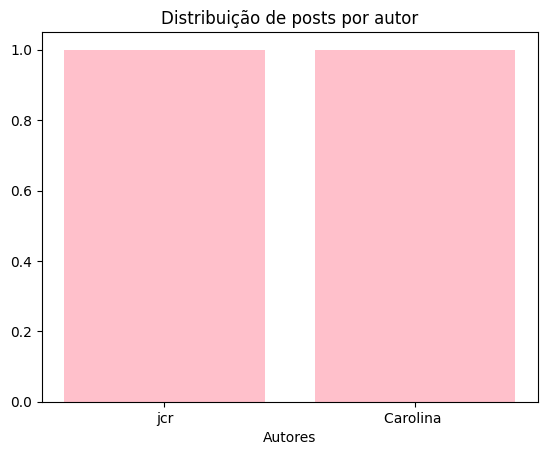

In [26]:
import matplotlib.pyplot as plt 

def postsPorAutor(redeSocial):
    autores=[]
    for post in redeSocial:
        autores.append(post["autor"])
    dic_autores = {}
    for autor in autores:
        if autor in dic_autores:
            dic_autores[autor] = dic_autores[autor] + 1
        else:
            dic_autores[autor] = 1

    xValores =list(dic_autores.keys())
    yValores = list(dic_autores.values())

    plt.bar(xValores, yValores, color='pink')

    plt.xlabel("Autores")
    
    plt.title("Distribuição de posts por autor")

    plt.show()


postsPorAutor(MyFaceBook)

#### g) `comentadoPor`, que recebe um autor e devolve a lista de posts comentados por esse autor.

In [31]:
print(MyFaceBook)

[{'id': 'p1', 'conteudo': 'A tarefa de avaliação é talvez a mais ingrata das tarefas que um professor tem de realizar...', 'autor': 'jcr', 'dataCriacao': '2023-07-20', 'comentarios': [{'comentario': 'Completamente de acordo...', 'autor': 'prh'}, {'comentario': 'Mas há quem goste...', 'autor': 'jj'}]}, {'id': 'p2', 'conteudo': 'Hoje esteve um ótimo dia ', 'autor': 'Carolina ', 'dataCriacao': '2023-11-20', 'comentarios': [{'comentario': 'Estava um ótimo dia para passear ', 'autor': 'Ana'}]}]


In [33]:
def comentadoPor(redeSocial, autor):
    lpostcomentadoa = []
    for post in redeSocial:
        if "comentarios" in post:
            for comentario in post["comentarios"]:
                if comentario["autor"] == autor:
                    lpostcomentadoa.append(post)
                else: 
                    print("O autor que inseriu não tem comentários no post")

    return lpostcomentadoa


comentadoPor(MyFaceBook,"Ana")

O autor que inseriu não tem comentários na rede social
O autor que inseriu não tem comentários na rede social


[{'id': 'p2',
  'conteudo': 'Hoje esteve um ótimo dia ',
  'autor': 'Carolina ',
  'dataCriacao': '2023-11-20',
  'comentarios': [{'comentario': 'Estava um ótimo dia para passear ',
    'autor': 'Ana'}]}]